# A demo of XYZ and RDKitMol

There is no easy way to convert xyz to RDKit Mol/RWMol. Here RDKitMol shows a possibility by using openbabel / method from Jensen et al. [1] as a molecule perception backend. 

[1] https://github.com/jensengroup/xyz2mol. 

In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath('')))

from rdmc.mol import RDKitMol

### 1. An example of xyz str block

In [2]:
######################################
# INPUT
xyz="""14

C         -1.77596        0.55032       -0.86182
C         -1.86964        0.09038       -2.31577
H         -0.88733        1.17355       -0.71816
H         -1.70996       -0.29898       -0.17103
O         -2.90695        1.36613       -0.53334
C         -0.58005       -0.57548       -2.76940
H         -0.35617       -1.45641       -2.15753
H          0.26635        0.11565       -2.71288
H         -0.67469       -0.92675       -3.80265
O         -2.92111       -0.86791       -2.44871
H         -2.10410        0.93662       -2.97107
O         -3.87923        0.48257        0.09884
H         -4.43402        0.34141       -0.69232
O         -4.16782       -0.23433       -2.64382
"""

xyz_wo_header = """O 2.136128  0.058786  -0.999372
C -1.347448  0.039725  0.510465
C 0.116046  -0.220125  0.294405
C 0.810093  0.253091  -0.73937
H -1.530204  0.552623  1.461378
H -1.761309  0.662825  -0.286624
H -1.923334  -0.892154  0.536088
H 0.627132  -0.833978  1.035748
H 0.359144  0.869454  -1.510183
H 2.513751  -0.490247  -0.302535"""
######################################

### 2. Use pybel to generate a OBMol from xyz

pybel backend, `header` to indicate if the str includes lines of atom number and title.

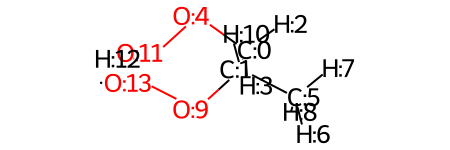

In [3]:
rdkitmol = RDKitMol.FromXYZ(xyz, backend='openbabel', header=True)
rdkitmol

Please correctly use `header` arguments, otherwise molecule perception can be problematic

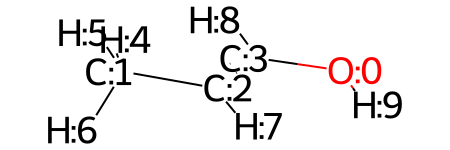

In [4]:
rdkitmol = RDKitMol.FromXYZ(xyz_wo_header, backend='openbabel', header=False)
rdkitmol

Using `jensen` backend. For most cases, Jensen's method returns the same molecule as using `pybel` backend

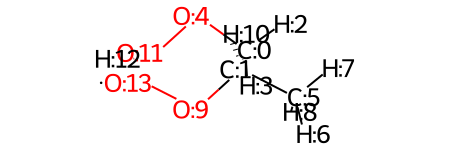

In [5]:
rdkitmol = RDKitMol.FromXYZ(xyz, backend='jensen', header=True)
rdkitmol

Here some options for Jensen et al. method are listed. The nomenclature is kept as it is in the original API.

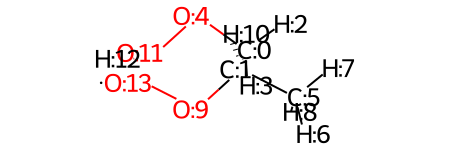

In [6]:
rdkitmol = RDKitMol.FromXYZ(xyz, backend='jensen',
                            header=True,
                            allow_charged_fragments=False,  # radical => False
                            use_graph=False,  # accelerate for larger molecule but needs networkx as backend
                            use_huckel=True,
                            embed_chiral=True)
rdkitmol

### 3. Check the xyz of rdkitmol conformer

In [7]:
rdkitmol.GetConformer().GetPositions()

array([[-1.77596,  0.55032, -0.86182],
       [-1.86964,  0.09038, -2.31577],
       [-0.88733,  1.17355, -0.71816],
       [-1.70996, -0.29898, -0.17103],
       [-2.90695,  1.36613, -0.53334],
       [-0.58005, -0.57548, -2.7694 ],
       [-0.35617, -1.45641, -2.15753],
       [ 0.26635,  0.11565, -2.71288],
       [-0.67469, -0.92675, -3.80265],
       [-2.92111, -0.86791, -2.44871],
       [-2.1041 ,  0.93662, -2.97107],
       [-3.87923,  0.48257,  0.09884],
       [-4.43402,  0.34141, -0.69232],
       [-4.16782, -0.23433, -2.64382]])

### 4. Export xyz

In [8]:
print(rdkitmol.ToXYZ(header=False))

C     -1.775960    0.550320   -0.861820
C     -1.869640    0.090380   -2.315770
H     -0.887330    1.173550   -0.718160
H     -1.709960   -0.298980   -0.171030
O     -2.906950    1.366130   -0.533340
C     -0.580050   -0.575480   -2.769400
H     -0.356170   -1.456410   -2.157530
H      0.266350    0.115650   -2.712880
H     -0.674690   -0.926750   -3.802650
O     -2.921110   -0.867910   -2.448710
H     -2.104100    0.936620   -2.971070
O     -3.879230    0.482570    0.098840
H     -4.434020    0.341410   -0.692320
O     -4.167820   -0.234330   -2.643820
